# Model selection, and p-values

Peter Ralph

https://uodsci.github.io/dsci345

In [36]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng(seed=123)

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

Outline:

1. We can fit models now (in two ways) but... what about "false positives",
    i.e., estimates of an effect when there isn't one?
2. Just fitting models willy-nilly leads to *bad* things:
    for instance, which studies are more likely to get spuriously large effects:
    small or large sample sizes?
3. One solution: also report the strength of support *against*
    a model of "no effect" (i.e., a p-value).
4. The t-test.

# False positives

## The danger of statistics

We now know how to fit models (in two ways!). Let's do experiments now!

Let's say we all go out and test our own favorite method for avoiding COVID:
vitamin C, vaccination, lots of coffee, lucky charms, chloroquine...
Everyone comes back with an estimate of
the relative risk of getting COVID using their treatment.
*How useful is this?*

Some people have much bigger studies than others:
whose methods will have the largest estimates:
large studies or small ones?

We need to also report a **measure of uncertainty**
and/or the **strength of statistical support**
for our results.

## My skeptical friend

*Me:* I have an amazing new treatment!
I had ten random people soak their feet in ice water three times a day for a month,
and none of them got sick!

*You:* Okay, sure, but they might not have got sick anyhow?

*Me:* I got that covered, ten other random people who didn't do this,
and three of them got sick.

*You:* Hm, okay, but isn't it kinda likely that you'd get such a big difference
even if the ice water doesn't do anything? Just by random chance?

*Me:* Gee, I dunno, how do we find out?

*You:* Well, this isn't perfect, but

In [2]:
ice = rng.binomial(n=10, p=3/20, size=10000)
not_ice = rng.binomial(n=10, p=3/20, size=10000)
np.mean(not_ice - ice >= 3)

np.float64(0.059)

## Fingers

I think that writing affects the ligaments in your fingers,
so that the index finger on peoples' writing hands tends to be a different length
than the index finger on the other hand.

Let's collect some data!

In [11]:
num_longer = 19
num_shorter = 6
rng.choice(['h', 't'])

np.str_('h')

In [32]:
np.sum(rng.choice(['h', 't'], size=25) == 'h')

np.int64(12)

It's maybe more natural to suppose there *isn't* a difference.
Okay, let's see how good my evidence is against this idea:
what's the probability that we'd see such a big difference
between those numbers even if we all just flipped coins to decide instead?

*Exercise:* find the "probability that we'd see such a big difference between those numbers even if we all just flipped coins", by simulation.

In [33]:
# short way:
coins = rng.choice(['h', 't'], size=(100000,25))
num_heads = np.sum(coins == 'h', axis=1)
np.mean(np.abs(num_heads - (25 - num_heads)) >= 13)

np.float64(0.01512)

# The p-value

The $p$-value is

> the probability of seeing a result
> at least as surprising as what we observed in the data,
> if the null hypothesis is true.

The parts of this are:

- *the probability ... if the null hypothesis is true*:
    we need a concrete model we can compute probabilities with

- *a result*: a statistic summarizing how strongly our data suggest that model is *not* right

- *at least as surprising*: usually, the statistic is chosen so that larger values are more surprising

In the finger exercise, we found the probability that
if we all flipped fair coins,
the difference
between the number of people with Heads and with Tails
was at least as big as <FILL ME>,
the difference between the number of people with longer writing-hand fingers
and those with shorter writing-hand fingers.
    
*Why's this a $p$-value?*

# Next: a test statistic

A common statistical task
is to *compare means*:
for instance, "is the outcome after this treatment better?"
or "is the proportion of responses to X higher than to Y?"

To use a $p$-value to summarize statistical results,
we need a good *test statistic*.

*Brainstorm:* what do we want this to look like?

# Aside: the sample SD

Recall that the *variance* of a random variable $X$ with mean $\mu$
is
$$ \text{var}[X] = \mathbb{E}[ (X - \mu)^2 ] . $$
If we have samples $x_1, \ldots, x_n$, with sample mean $\bar x = (x_1 + \cdots + x_n)/n$,
this suggests estimating the variance of the distribution they are drawn from as
$$ \sigma^2(x) =  \frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2 . $$

**However:** the estimator for $\var[X]$ you *want* to use
has an $n-1$ instead of $n$, and is called the *sample variance:*
$$ s^2(x) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2 . $$

It is an *unbiased* estimator: if $X_1, \ldots, X_n$ are independent draws from $X$, then
$$ \E[s^2(X_1, \ldots, X_n)] = \var[X], $$
while $\sigma^2(X)$ gives an underestimate:
$$ \E[\sigma^2(X_1, \ldots, X_n)] = \frac{n-1}{n} \var[X]. $$

*Warning:* `np.std( )` returns $\sigma^2( )$.

To get the *sample SD*, $s(x)$, use `np.std(x, ddof=1)`.

Checking this with math is straightforward but tedious;
here's a quick simulation check:

In [38]:
x = rng.exponential(size=10)
assert np.std(x) == np.sqrt(sigma2(x))

np.float64(0.9429174338548572)

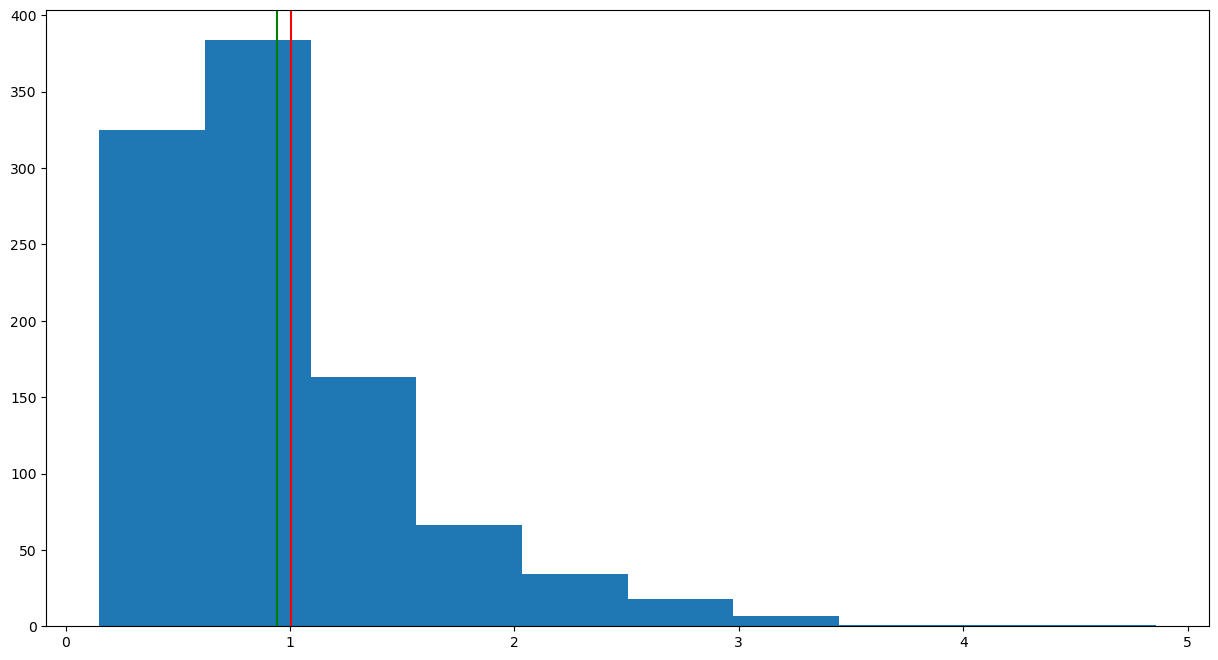

In [46]:
true_variance = np.std(rng.exponential(size=1000000))**2

n = 20
sig_vals = [sigma2(rng.exponential(size=n)) for _ in range(1000)]

fig, ax = plt.subplots()
ax.hist(sig_vals)
ax.axvline(true_variance, c='red')
ax.axvline(np.mean(sig_vals), c='green')

np.mean(sig_vals)

In [34]:
def sigma2(x):
    return np.sum((x - np.mean(x))**2)/len(x)

def s2(x):
    return np.sum((x - np.mean(x))**2)/(len(x) - 1)

n = 4
sig_vals = [sigma2(rng.exponential(size=n)) for _ in range(1000)]
s_vals = [s2(rng.exponential(size=n)) for _ in range(1000)]
true_var = np.var(rng.exponential(size=10000))

print(f"The true variance is {true_var}.")
print(f"The mean sigma^2 is {np.mean(sig_vals)}.")
print(f"The mean sample variance is {np.mean(s_vals)}.")

The true variance is 0.982441850170816.
The mean sigma^2 is 0.7969272040043704.
The mean sample variance is 1.0690682136551606.


# The $t$-things

It turns out that thanks to the Central Limit Theorem,
if 

- $X_1, \ldots, X_n$ are a bunch of independent samples from some distribution with mean $\mu$,
- $\bar X$ is the sample mean, and
- $S$ is the sample standard deviation,

then the difference between the sample mean and $\mu$, in units of $S/\sqrt{n}$:
$$  T = \frac{\bar X - \mu}{S/\sqrt{n}}  $$
has, approximately$^*$, [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
with $n-1$ degrees of freedom.

$^*$ (the approximation is better the bigger $n$ is and the closer $X_i$ is to Normal)

So: let's suppose we have measurements $x_1, \ldots, x_n$.

1. How do we estimate the mean? With the sample mean, $(x_1 + \cdots + x_n)/n$.
    And, the SD? With the sample SD, $s$.

2. How sure are we the mean is not zero?
    Well, if it *was* zero, then $t = \bar x / (s/\sqrt{n})$ would be Student's $t(n-1)$ distributed,
    so if $t$ is bigger than we'd expect then we can be pretty sure:
    the $p$-value is
    $$ \P\{ T > t \} , $$
    where $T$ is Student's t with $n-1$ degrees of freedom.

In other words:

- The sample mean, $\bar X$, is likely close to the true mean, $\mu$.
- How close? Probably only a few multiples of the "standard error of the mean", $S/\sqrt{n}$.
- How many multiples? Well, that quantity is $t$-distributed, so you can calculate whatever you like about it.

## Example

Let's say we've measured how typing speed
of 100 people changes after drinking coffee:
the average change is 3 wpm and the SD is 10 wpm.
Is this good evidence that coffee increases typing speed?

Well, this has a $t$ statistic of
$$ t = \frac{3}{10/\sqrt{100}} = 3, $$
and the probability a $t$ distribution with 99 degrees of freedom is at least 3 is

In [35]:
from scipy.stats import t
2 * (1 - t.cdf(3, df=99))

np.float64(0.003415507921578742)

... so, it does seem like good evidence? ($p = 0.003$, $t$-test with $\text{df}=98$)

We found an average of 3 wpm higher after drinking coffee;
this is good evidence that coffee increases typing speed
($p = 0.003$, by $t$-test with df=98).

If there was no mean difference in typing speed,
the chance that we would see a difference as big as what we saw
is only 0.3%.

If I do 1000 different studies and none of the things I'm looking for are real,
then I only expect statistical evidence that is this strong
in about 3 of them.

**However:** this does *not* answer the questions:
"What is the range of likely increases in typing speed?"
*(see: confidence intervals)*
or
"Is this difference in typing speed big enough to care about?"
*(just think about the problem)*